Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y'],
      dtype='object')
['WARRANTS' 'OTHER OFFENSES' 'LARCENY/THEFT' 'VEHICLE THEFT' 'VANDALISM'
 'NON-CRIMINAL' 'ROBBERY' 'ASSAULT' 'WEAPON LAWS' 'BURGLARY'
 'SUSPICIOUS OCC' 'DRUNKENNESS' 'FORGERY/COUNTERFEITING' 'DRUG/NARCOTIC'
 'STOLEN PROPERTY' 'SECONDARY CODES' 'TRESPASS' 'MISSING PERSON' 'FRAUD'
 'KIDNAPPING' 'RUNAWAY' 'DRIVING UNDER THE INFLUENCE'
 'SEX OFFENSES FORCIBLE' 'PROSTITUTION' 'DISORDERLY CONDUCT' 'ARSON'
 'FAMILY OFFENSES' 'LIQUOR LAWS' 'BRIBERY' 'EMBEZZLEMENT' 'SUICIDE'
 'LOITERING' 'SEX OFFENSES NON FORCIBLE' 'EXTORTION' 'GAMBLING'
 'BAD CHECKS' 'TREA' 'RECOVERED VEHICLE' 'PORNOGRAPHY/OBSCENE MAT']
Category
LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                   

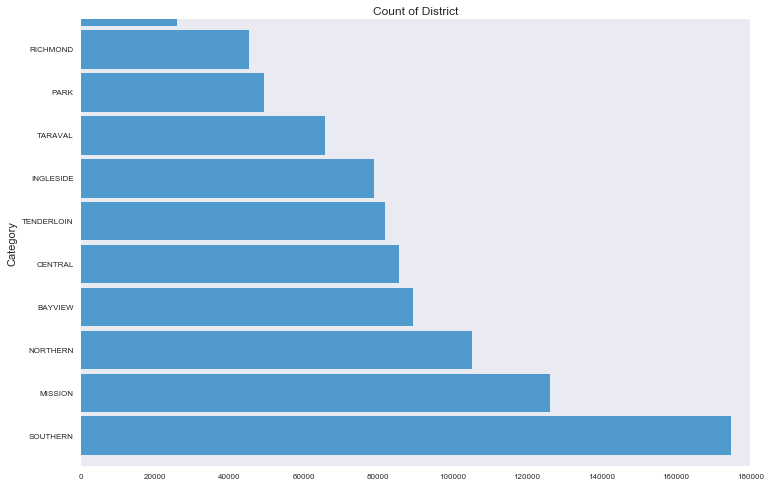

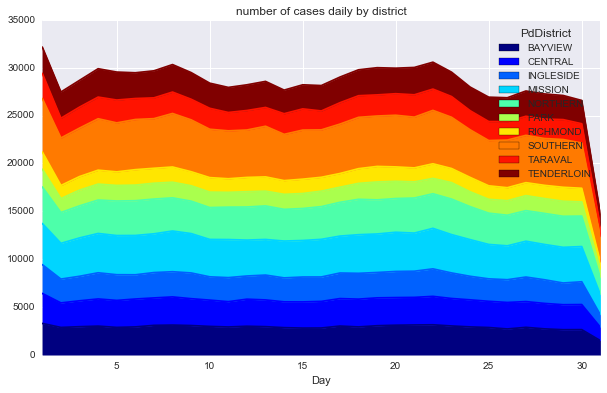

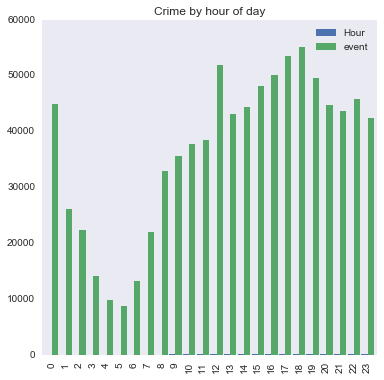

In [2]:
get_ipython().magic('matplotlib inline')

import pandas as pd
import numpy as np
import os
import time
import matplotlib.pyplot as plt
import zipfile
import seaborn as sns


# In[2]:

import zipfile


# In[3]:

df = pd.read_csv("../input/train.csv")


# In[4]:

df["Dates"] = pd.to_datetime(df["Dates"])


# Print to show features in the dataset

# In[5]:

print(df.columns)


# print to show the labeled categories in dataset

# In[6]:

print(df["Category"].unique())


# Then plot to show the number of each categories

# In[7]:

#group each category and then plot to show the number of each category
categories = df.groupby("Category")["Category"].count()
categories = categories.sort_values(ascending=0)
plt.figure()
categories.plot(kind='barh', title="Count of Category",
                    fontsize=8,
                    figsize=(12,8),
                    stacked=False,
                    width=0.9,
                    color='#509ace',
                    zorder = 3,
                    edgecolor = "none",
                    )
plt.grid()
plt.savefig("category_count.png")
print(categories)


# From the figure shown above, number of LARCENY/THEFT is the largest. 

# In[8]:

# add time attributes to df
df['Year'] = df['Dates'].map(lambda x: x.year)
df['Week'] = df['Dates'].map(lambda x: x.week)
df['Hour'] = df['Dates'].map(lambda x: x.hour)
df['Day'] = df['Dates'].map(lambda x: x.day)


# In[9]:

print(df.head())


# plot to show relationship between crime number and sf districts

# In[10]:

df.PdDistrict.value_counts().plot(kind='barh', title="Count of District",
                                  fontsize=8,
                                  figsize=(12,8),
                                  stacked=False,
                                  width=0.9,
                                  color='#509ace',
                                  zorder = 3,
                                  edgecolor = "none",)
plt.grid()
plt.savefig('district_counts.png')


# In[13]:

df['event']=1
daily_district_events = df[['PdDistrict','Day','event']].groupby(['PdDistrict','Day']).count().reset_index()
daily_district_events_pivot = daily_district_events.pivot(index='Day', columns='PdDistrict', values='event').fillna(method='ffill')
daily_district_events_pivot.interpolate().plot.area(title='number of cases daily by district', figsize=(10,6),colormap="jet")
plt.savefig('daily_events_by_district.png')


# In[20]:

hourly_events = df[['Hour','event']].groupby(['Hour']).count().reset_index()
hourly_events.plot(kind='bar',width=0.9, title="Crime by hour of day",                        
                                  zorder = 3,
                                  edgecolor = "none", figsize=(6, 6))
plt.grid()
plt.savefig('hourly_events.png')

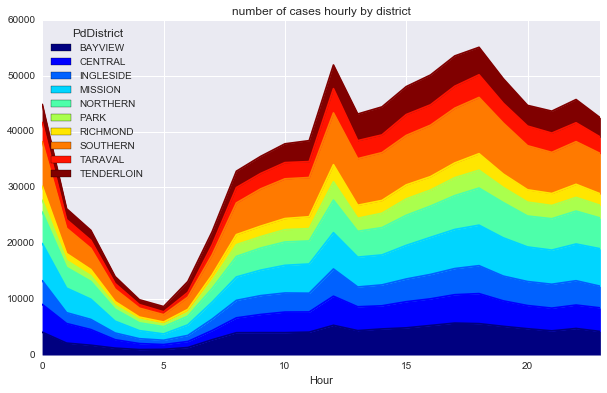

In [3]:
hourly_district_events = df[['PdDistrict','Hour','event']].groupby(['PdDistrict','Hour']).count().reset_index()
hourly_district_events_pivot = hourly_district_events.pivot(index='Hour', columns='PdDistrict', values='event').fillna(method='ffill')
hourly_district_events_pivot.interpolate().plot.area(title='number of cases hourly by district', figsize=(10,6),colormap="jet")
plt.savefig('hourly_events_by_district.png')


In [ ]:
mapdata = np.loadtxt("../input/sf_map_copyright_openstreetmap_contributors.txt")
asp = mapdata.shape[0] * 1.0 / mapdata.shape[1]


lon_lat_box = (-122.5247, -122.3366, 37.699, 37.8299)
clipsize = [[-122.5247, -122.3366],[ 37.699, 37.8299]]


z = zipfile.ZipFile('../input/train.csv.zip')
train = pd.read_csv(z.open('train.csv'))


train['Xok'] = train[train.X<-121].X
train['Yok'] = train[train.Y<40].Y
train = train.dropna()
trainP = train[train.Category == 'PROSTITUTION'] #Grab the prostitution crimes
trainL = train[train.Category == 'LARCENY/THEFT']
trainA = train[train.Category == 'ASSAULT']
trainV = train[train.Category == 'VEHICLE THEFT']
train = train[1:300000]


#Do a larger plot with all categories
ax = plt.hexbin(trainP.Xok, trainP.Yok, cmap='inferno',alpha = 0.4,
                  bins=5,
                  mincnt=1)
ax = sns.kdeplot(train.Xok, train.Yok, clip=clipsize, aspect=1/asp)
ax.imshow(mapdata, cmap=plt.get_cmap('gray'),
              extent=lon_lat_box, aspect=asp)
plt.savefig('density_plot.png')
plt.cla()